# 2D Convolution

Your code will take an input tensor *input* with shape (n, iC, H, W) and a kernel *kernel* with shape (oC, iC, kH, kW). It needs then to apply a 2D convolution over input, using *kernel* as kernel tensor and no bias, using a stride of 1, no dilation, no grouping, and no padding, and store the result in out. Both input and kernel have dtype torch.float32.

In [25]:
import random
import torch
from matplotlib import pyplot as plt

n = random.randint(2, 6)
iC = random.randint(2, 6)
oC = random.randint(2, 6)
H = random.randint(10, 20)
W = random.randint(10, 20)
kH = random.randint(2, 6)
kW = random.randint(2, 6)

input = torch.rand(n, iC, H, W, dtype=torch.float32)
kernel = torch.rand(oC, iC, kH, kW, dtype=torch.float32)

print("input:", input.shape)
print("kernel:", kernel.shape)

input: torch.Size([4, 5, 11, 16])
kernel: torch.Size([3, 5, 4, 5])


In [27]:
wo = int((W - kW)/1 + 1)
ho = int((H - kH)/1 + 1)
out = torch.zeros((n,oC,ho,wo))
k = torch.unsqueeze(kernel,dim=0)       #now k.shape is (1,oC,iC,kH,kW)

for i in range(wo):
    for j in range(ho):
        im = input[:,:,j:j+kH,i:i+kW]
        im = torch.unsqueeze(im, dim=1) #now im.shape is (n,1,iC,kH,kW) -->ready for broadcasting
        res = im*k
        out[:,:,j,i] = res.sum((2,3,4))

print(out.shape)

torch.Size([4, 3, 8, 12])


In [33]:
import torch.nn as nn

#alternative made with nn.module
class SimpleConv(nn.Module):
    def __init__(self, kernel:torch.Tensor, padding=0, bias=False):
        super().__init__()
        self.kernelConv = nn.Conv2d(
            in_channels= kernel.shape[1],
            out_channels= kernel.shape[0],
            kernel_size= [kernel.shape[2], kernel.shape[3]],
            padding=padding,
            bias=bias
        )

        weights = nn.parameter.Parameter(data=kernel, requires_grad=False)
        self.kernelConv.weight = weights

    def forward(self, X):
        with torch.no_grad():
            return self.kernelConv(X)

model = SimpleConv(kernel)
convOut = model(input)
print("output:", convOut.shape)

output: torch.Size([4, 3, 8, 12])


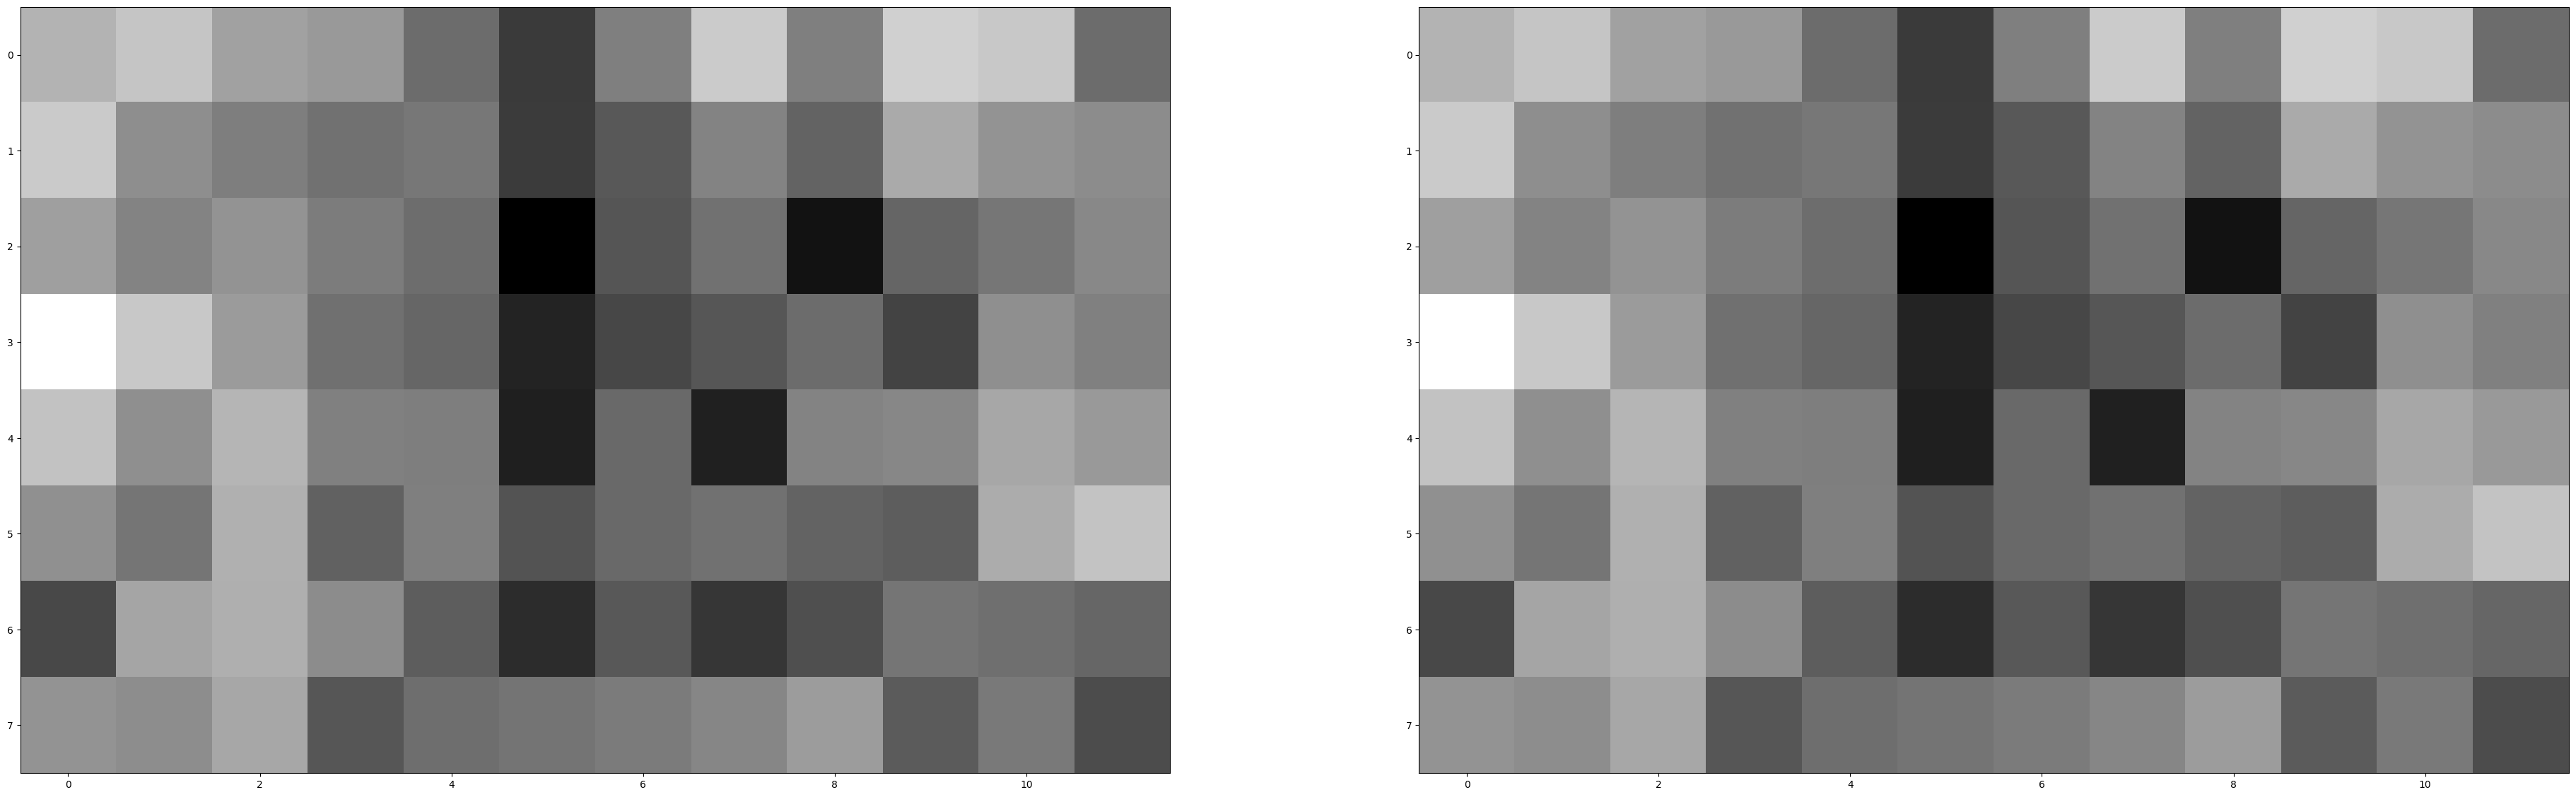

In [31]:
#check results are equals
fig = plt.figure(figsize=(200, 200))
fig.add_subplot(wo, ho, 1)
plt.imshow(out[0,0],cmap='gray')
fig.add_subplot(wo, ho, 2)
plt.imshow(convOut[0,0], cmap='gray')
plt.show()